In [1]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

In [2]:
@element(num_params=2, units=["Ohm", "F"],overwrite=True)
def TLMuniNew(p, f):
   
    omega = 2 * np.pi * np.array(f)
    R1, Q = p[0], p[1]
    Z= 2*np.sqrt(R1/(omega*1j*Q))*(1/(np.tanh(np.sqrt(1j*omega*R1*Q))))
    return Z

In [31]:
tlmuni=CustomCircuit(initial_guess=[2000,1e-4],circuit="TLMuniNew")
tlmuni_guess=CustomCircuit(initial_guess=[1000,1e-4],circuit="TLMuniNew")
freq=np.logspace(-1,3,50)
z_uni=tlmuni.predict(freq)
err_noise=0.10
z_uni=np.random.normal(np.real(z_uni),np.abs(err_noise*np.real(z_uni)))+1j*np.random.normal(np.imag(z_uni),np.abs(err_noise*np.imag(z_uni)))


Circuit string: TLMuniNew
Fit: True

Initial guesses:
  TLMuniNew_0 = 1.00e+03 [Ohm]
  TLMuniNew_1 = 1.00e-04 [F]

Fit parameters:
  TLMuniNew_0 = 2.05e+03  (+/- 8.54e+01) [Ohm]
  TLMuniNew_1 = 9.60e-05  (+/- 4.33e-07) [F]



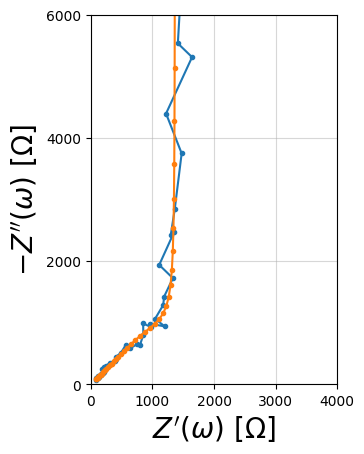

In [32]:

sgm_mod=np.concatenate((np.abs(z_uni),np.abs(z_uni)))
sgm_prop=np.concatenate((np.real(z_uni),np.imag(z_uni)))
tlmuni_guess=tlmuni_guess.fit(freq,z_uni,)
z_fit=tlmuni_guess.predict(freq)
f,ax=plt.subplots()
plot_nyquist(z_uni,ax=ax)
plot_nyquist(z_fit,ax=ax)
ax.set_xlim(0,4000)
ax.set_ylim(0,6000)

print(tlmuni_guess)

In [5]:
aa=8+1j*9

print(np.sqrt(8**2+9**2),np.abs(aa))

12.041594578792296 12.041594578792296
